In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [71]:
data = pd.read_csv("interest_rate_records.csv")

In [72]:
data.head()

,1_year_treasury_bill,10_year_treasury_constant_maturity,time_period,federal_funds
0,1.18,2.24,2017-08-09,1.16
1,1.21,2.29,2017-08-08,1.16
2,1.19,2.26,2017-08-07,1.16
3,NaN,NaN,2017-08-06,1.16
4,NaN,NaN,2017-08-05,1.16


In [73]:
df = data.copy()
df.head()

,1_year_treasury_bill,10_year_treasury_constant_maturity,time_period,federal_funds
0,1.18,2.24,2017-08-09,1.16
1,1.21,2.29,2017-08-08,1.16
2,1.19,2.26,2017-08-07,1.16
3,NaN,NaN,2017-08-06,1.16
4,NaN,NaN,2017-08-05,1.16


In [74]:
df.shape

(3654, 4)

In [75]:
df.describe()

,1_year_treasury_bill,10_year_treasury_constant_maturity,federal_funds
count,2610.000000,2610.000000,3654.000000
mean,-1187.256241,-407.356238,0.560966
std,3235.653488,1983.525330,1.053439
min,-9999.000000,-9999.000000,0.040000
25%,0.110000,1.980000,0.100000
50%,0.220000,2.470000,0.150000
75%,0.460000,3.320000,0.370000
max,2.580000,4.810000,5.410000


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   1_year_treasury_bill                2610 non-null   float64
 1   10_year_treasury_constant_maturity  2610 non-null   float64
 2   time_period                         3654 non-null   object 
 3   federal_funds                       3654 non-null   float64
dtypes: float64(3), object(1)
memory usage: 114.3+ KB


In [77]:
df.isna().sum()

1_year_treasury_bill                  1044
10_year_treasury_constant_maturity    1044
time_period                              0
federal_funds                            0
dtype: int64

In [78]:
df.isnull().sum()

1_year_treasury_bill                  1044
10_year_treasury_constant_maturity    1044
time_period                              0
federal_funds                            0
dtype: int64

In [79]:
# Convert time_period to datetime format
df["time_period"] = pd.to_datetime(df["time_period"])

In [80]:
df.head()

,1_year_treasury_bill,10_year_treasury_constant_maturity,time_period,federal_funds
0,1.18,2.24,2017-08-09,1.16
1,1.21,2.29,2017-08-08,1.16
2,1.19,2.26,2017-08-07,1.16
3,NaN,NaN,2017-08-06,1.16
4,NaN,NaN,2017-08-05,1.16


In [81]:
df1 = df.loc[df["time_period"] >= '2008-06-02', ["time_period","1_year_treasury_bill"]]
df1.tail()

,time_period,1_year_treasury_bill
3351,2008-06-06,2.06
3352,2008-06-05,2.09
3353,2008-06-04,2.08
3354,2008-06-03,2.08
3355,2008-06-02,-9999.00


In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3355
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time_period           3356 non-null   datetime64[ns]
 1   1_year_treasury_bill  2398 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 78.7 KB


In [83]:
df1.isna().sum()

time_period               0
1_year_treasury_bill    958
dtype: int64

In [84]:
df1["1_year_treasury_bill"] = df1["1_year_treasury_bill"].replace(-9999, pd.NA)

In [85]:
df1.isna().sum()

time_period                0
1_year_treasury_bill    1056
dtype: int64

In [86]:
df1.groupby("1_year_treasury_bill").size().sort_values(ascending=False)

1_year_treasury_bill
0.11    144
0.10    133
0.12     92
0.17     87
0.18     79
       ... 
2.48      1
2.49      1
2.53      1
2.54      1
2.58      1
Length: 182, dtype: int64

In [87]:
# Forward fill first, then backward fill
df1_filled = df1.copy()
df1_filled['1_year_treasury_bill'] = df1_filled['1_year_treasury_bill'].ffill().bfill()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32284\3373779414.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1_filled['1_year_treasury_bill'] = df1_filled['1_year_treasury_bill'].ffill().bfill()


In [88]:
df1_filled.isna().sum()

time_period             0
1_year_treasury_bill    0
dtype: int64

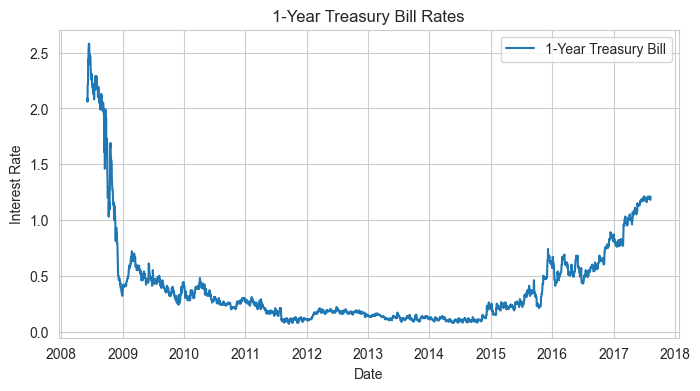

In [93]:
plt.figure(figsize=(8, 4))
plt.plot(df1_filled['time_period'], df1_filled['1_year_treasury_bill'], label="1-Year Treasury Bill")
plt.xlabel("Date")
plt.ylabel("Interest Rate")
plt.title("1-Year Treasury Bill Rates")
plt.legend()
plt.show()

In [96]:
df2 = df[["time_period","10_year_treasury_constant_maturity"]]
df2.tail()

,time_period,10_year_treasury_constant_maturity
3649,2007-08-13,4.78
3650,2007-08-12,NaN
3651,2007-08-11,NaN
3652,2007-08-10,4.81
3653,2007-08-09,4.79


In [98]:
df2.isna().sum()

time_period                              0
10_year_treasury_constant_maturity    1044
dtype: int64

In [22]:
df2["10_year_treasury_constant_maturity"] = df2["10_year_treasury_constant_maturity"].replace(-9999, pd.NA)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32284\2179475213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["10_year_treasury_constant_maturity"] = df2["10_year_treasury_constant_maturity"].replace(-9999, pd.NA)


In [23]:
# Forward fill first, then backward fill
df2_filled = df2.copy()
df2_filled['10_year_treasury_constant_maturity'] = df2_filled['10_year_treasury_constant_maturity'].ffill().bfill()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32284\1691648979.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2_filled['10_year_treasury_constant_maturity'] = df2_filled['10_year_treasury_constant_maturity'].ffill().bfill()


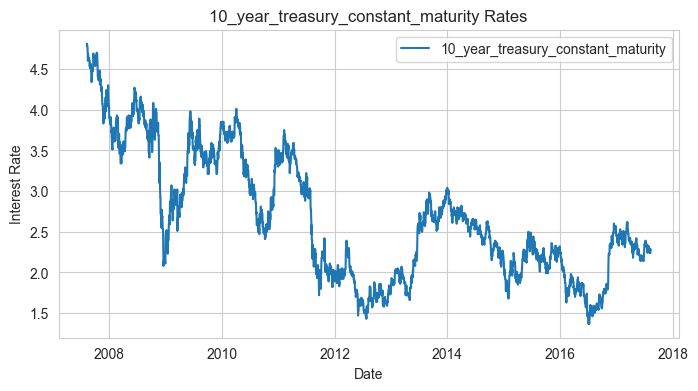

In [100]:
plt.figure(figsize=(8, 4))
plt.plot(df2_filled['time_period'], df2_filled['10_year_treasury_constant_maturity'], label="10_year_treasury_constant_maturity")
plt.xlabel("Date")
plt.ylabel("Interest Rate")
plt.title("10_year_treasury_constant_maturity Rates")
plt.legend()
plt.show()

In [101]:
df3 = df[["time_period","federal_funds"]]
df3.head()

,time_period,federal_funds
0,2017-08-09,1.16
1,2017-08-08,1.16
2,2017-08-07,1.16
3,2017-08-06,1.16
4,2017-08-05,1.16


In [102]:
df3.isna().sum()

time_period      0
federal_funds    0
dtype: int64

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time_period    3654 non-null   datetime64[ns]
 1   federal_funds  3654 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [27]:
df3.describe()

,time_period,federal_funds
count,3654,3654.000000
mean,2012-08-08 12:00:00,0.560966
min,2007-08-09 00:00:00,0.040000
25%,2010-02-07 06:00:00,0.100000
50%,2012-08-08 12:00:00,0.150000
75%,2015-02-07 18:00:00,0.370000
max,2017-08-09 00:00:00,5.410000
std,NaN,1.053439


In [28]:
df3.isna().sum()

time_period      0
federal_funds    0
dtype: int64

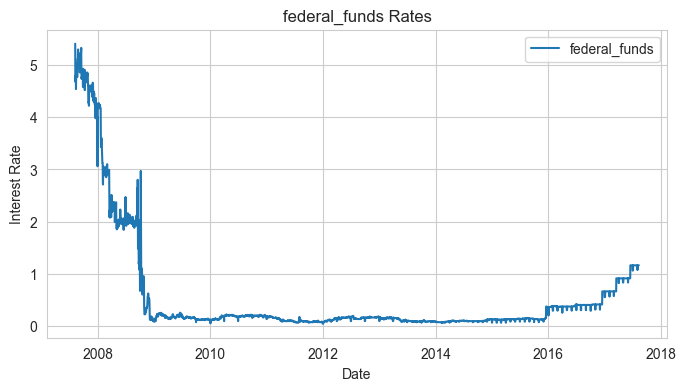

In [95]:
plt.figure(figsize=(8, 4))
plt.plot(df3['time_period'], df3['federal_funds'], label="federal_funds")
plt.xlabel("Date")
plt.ylabel("Interest Rate")
plt.title("federal_funds Rates")
plt.legend()
plt.show()

In [103]:
df_final = df1_filled.merge(df2_filled, on='time_period', how='outer').merge(df3, on='time_period', how='outer')
df_final.tail()

,time_period,1_year_treasury_bill,10_year_treasury_constant_maturity,federal_funds
3649,2017-08-05,1.19,2.26,1.16
3650,2017-08-06,1.19,2.26,1.16
3651,2017-08-07,1.19,2.26,1.16
3652,2017-08-08,1.21,2.29,1.16
3653,2017-08-09,1.18,2.24,1.16


In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   time_period                         3654 non-null   datetime64[ns]
 1   1_year_treasury_bill                3356 non-null   float64       
 2   10_year_treasury_constant_maturity  3654 non-null   float64       
 3   federal_funds                       3654 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 114.3 KB


In [32]:
df_final.isna().sum()

time_period                             0
1_year_treasury_bill                  298
10_year_treasury_constant_maturity      0
federal_funds                           0
dtype: int64

In [33]:
df_final.describe().T

,count,mean,min,25%,50%,75%,max,std
time_period,3654,2012-08-08 12:00:00,2007-08-09 00:00:00,2010-02-07 06:00:00,2012-08-08 12:00:00,2015-02-07 18:00:00,2017-08-09 00:00:00,NaN
1_year_treasury_bill,3356.0,0.411821,0.07,0.14,0.25,0.5,2.58,0.434828
10_year_treasury_constant_maturity,3654.0,2.673106,1.37,2.0325,2.51,3.35,4.81,0.778798
federal_funds,3654.0,0.560966,0.04,0.1,0.15,0.37,5.41,1.053439


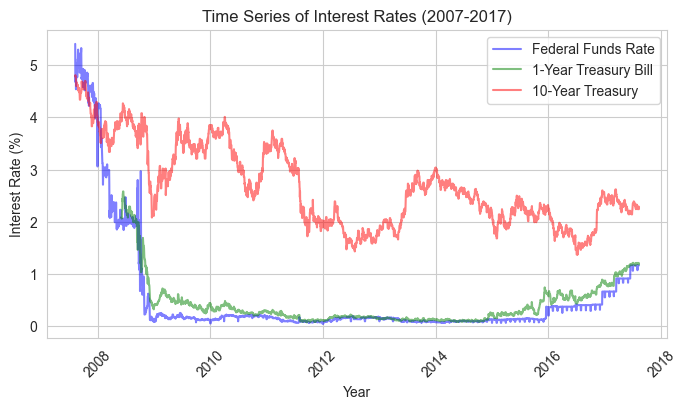

In [114]:
# Convert time_period to datetime format for proper plotting
df_final["time_period"] = pd.to_datetime(df_final["time_period"])

# Set figure size and style
sns.set_style("whitegrid")

# Plot Time Series of Interest Rates
plt.figure(figsize=(8, 4))
plt.plot(df_final["time_period"], df_final["federal_funds"], label="Federal Funds Rate", color="blue", alpha=0.5)
plt.plot(df_final["time_period"], df_final["1_year_treasury_bill"], label="1-Year Treasury Bill", color="green", alpha=0.5)
plt.plot(df_final["time_period"], df_final["10_year_treasury_constant_maturity"], label="10-Year Treasury", color="red", alpha =0.5)
plt.xlabel("Year")
plt.ylabel("Interest Rate (%)")
plt.title("Time Series of Interest Rates (2007-2017)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [35]:
# Select relevant columns
columns_to_analyze = ["federal_funds", "1_year_treasury_bill", "10_year_treasury_constant_maturity"]

In [36]:
# Compute descriptive statistics
descriptive_stats = df_final[columns_to_analyze].describe().T

In [37]:
# Compute Interquartile Range (IQR)
descriptive_stats["IQR"] = df_final[columns_to_analyze].quantile(0.75) - df_final[columns_to_analyze].quantile(0.25)

In [38]:
descriptive_stats

,count,mean,std,min,25%,50%,75%,max,IQR
federal_funds,3654.0,0.560966,1.053439,0.04,0.1000,0.15,0.37,5.41,0.2700
1_year_treasury_bill,3356.0,0.411821,0.434828,0.07,0.1400,0.25,0.50,2.58,0.3600
10_year_treasury_constant_maturity,3654.0,2.673106,0.778798,1.37,2.0325,2.51,3.35,4.81,1.3175


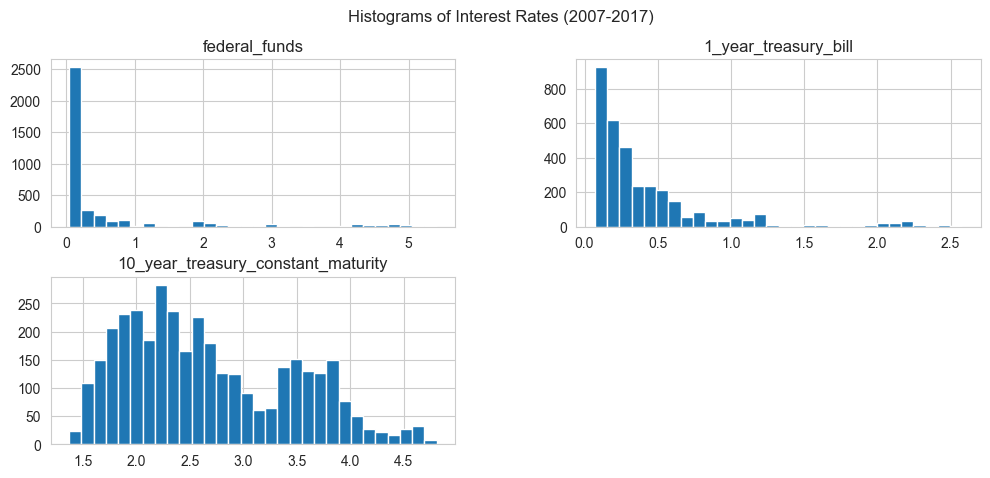

In [39]:
# Histogram for each interest rate
df_final[["federal_funds", "1_year_treasury_bill", "10_year_treasury_constant_maturity"]].hist(bins=30, figsize=(12, 5))# color=["blue", "green", "red"]
plt.suptitle("Histograms of Interest Rates (2007-2017)")
plt.show()

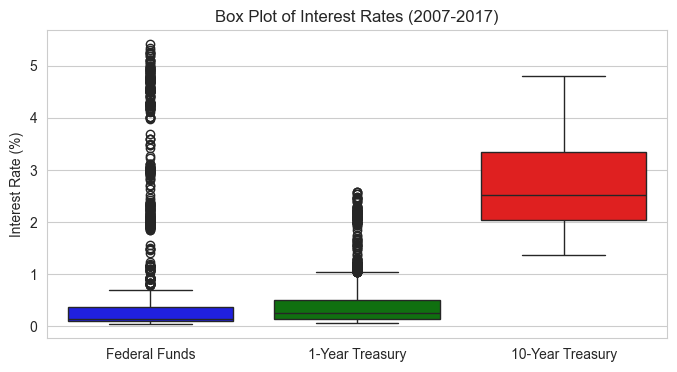

In [115]:
# Box Plots to show distribution and outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_final[["federal_funds", "1_year_treasury_bill", "10_year_treasury_constant_maturity"]], palette=["blue", "green", "red"])
plt.title("Box Plot of Interest Rates (2007-2017)")
plt.ylabel("Interest Rate (%)")
plt.xticks(ticks=[0, 1, 2], labels=["Federal Funds", "1-Year Treasury", "10-Year Treasury"])
plt.show()

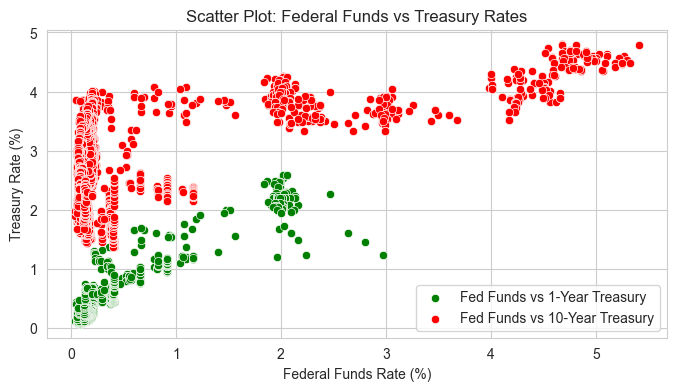

In [116]:
# Scatter Plot: Federal Funds vs Treasury Rates
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df_final["federal_funds"], y=df_final["1_year_treasury_bill"], label="Fed Funds vs 1-Year Treasury", color="green")
sns.scatterplot(x=df_final["federal_funds"], y=df_final["10_year_treasury_constant_maturity"], label="Fed Funds vs 10-Year Treasury", color="red")
plt.xlabel("Federal Funds Rate (%)")
plt.ylabel("Treasury Rate (%)")
plt.title("Scatter Plot: Federal Funds vs Treasury Rates")
plt.legend()
plt.show()

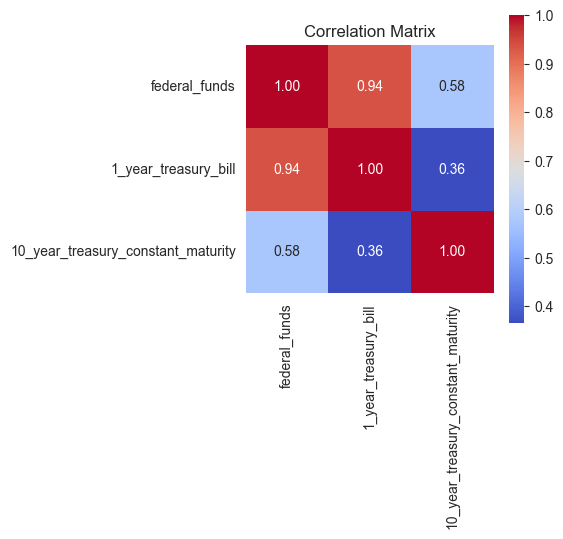

In [120]:
plt.figure(figsize=(4, 4))
sns.heatmap(df_final[columns_to_analyze].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'KDE Plot of Interest Rates')

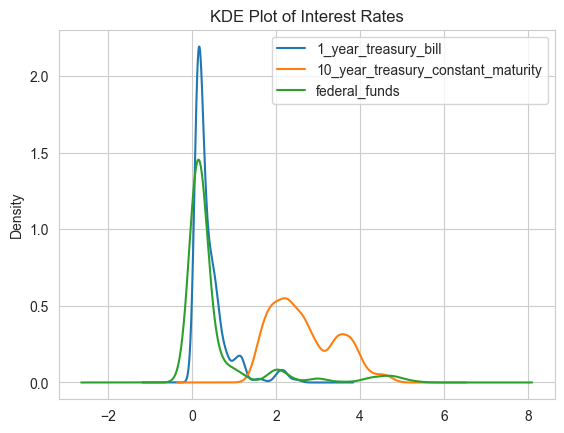

In [109]:
# Kernel Density Estimation (KDE) Plot
# fig, axes = plt.subplots(2, 2, figsize=(14, 10))
df = df_final[["1_year_treasury_bill","10_year_treasury_constant_maturity","federal_funds"]]
df.plot(kind='kde', legend=True)
plt.title("KDE Plot of Interest Rates")

Text(0.5, 1.0, 'Histogram of Interest Rates')

<Figure size 600x400 with 0 Axes>

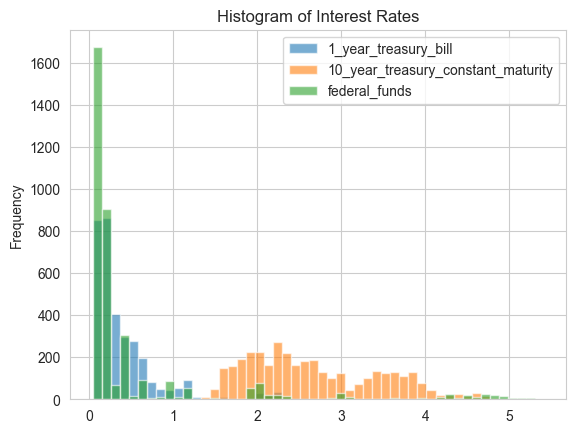

In [122]:
# Histograms to show frequency distribution
plt.figure(figsize=(6, 4))
df.plot(kind='hist', bins=50, alpha=0.6, legend=True)
plt.title("Histogram of Interest Rates")